In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime
import os

In [ ]:
# Root folder path
root_path = 'path/to/soccernet/england_epl/'

# Containers to store combined data
all_labels = []
all_labels_v2 = []
all_labels_cameras = []
label_count_dict = {}
labelv2_count_dict = {}
label_cam_count_dict={}
for season_folder in os.listdir(root_path):
    season_path = os.path.join(root_path, season_folder)

    if not os.path.isdir(season_path):
        continue  # Skip non-directory files

    print(f"Processing season: {season_folder}")

    # Loop through all match folders in the season
    for match_folder in os.listdir(season_path):
        match_path = os.path.join(season_path, match_folder)

        if not os.path.isdir(match_path):
            continue

        try:
            # Load Labels.json
            with open(os.path.join(match_path, 'Labels.json')) as f:
                labels = json.load(f)
                for ann in labels['annotations']:
                    ann['match'] = match_folder
                    ann['season'] = season_folder
                    all_labels.append(ann)

                    # Update label count
                    label = ann['label']

                    if label == 'soccer-ball-own':
                        label = 'soccer-ball'

                    if label not in label_count_dict:
                        label_count_dict[label] = 0
                    label_count_dict[label] += 1

            # print(f"Loaded: {match_folder}")
            # print(f"Labels in match: {[ann['label'] for ann in labels['annotations']]}")

            # Load Labels-v2.json
            with open(os.path.join(match_path, 'Labels-v2.json')) as f:
                labels_v2 = json.load(f)
                for ann in labels_v2['annotations']:
                    ann['match'] = match_folder
                    ann['season'] = season_folder
                    all_labels_v2.append(ann)

            # print(f"Loaded: {match_folder}")
            # print(f"Labels_v2 in match: {[ann['label'] for ann in labels_v2['annotations']]}")

            for ann in labels_v2['annotations']:
                if ann['label'] not in labelv2_count_dict:
                    labelv2_count_dict[ann['label']]=0
                labelv2_count_dict[ann['label']]+=1


            # Load Labels-cameras.json
            with open(os.path.join(match_path, 'Labels-cameras.json')) as f:
                labels_cameras = json.load(f)
                for ann in labels_cameras['annotations']:
                    ann['match'] = match_folder
                    ann['season'] = season_folder
                    all_labels_cameras.append(ann)

            print(f"Loaded: {match_folder}")
            print(f"Labels_camera in match: {[ann['replay'] for ann in labels_cameras['annotations']]}")

            for ann in labels_cameras['annotations']:
                if ann['replay'] not in label_cam_count_dict:
                    label_cam_count_dict[ann['replay']]=0
                label_cam_count_dict[ann['replay']]+=1

        except Exception as e:
            print(f"  Error loading {match_folder}: {e}")

Processing season: 2014-2015
Loaded: 2015-02-21 - 18-00 Chelsea 1 - 1 Burnley
Labels_camera in match: ['real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'replay', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'replay', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'replay', 'replay', 'replay', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'real-time', 'r

In [ ]:
# Convert annotations to DataFrames
# df_labels = pd.DataFrame(labels['annotations'])
# df_labels_v2 = pd.DataFrame(labels_v2['annotations'])
# df_labels_cameras = pd.DataFrame(labels_cameras['annotations'])
print(label_count_dict)
print(labelv2_count_dict)

{'soccer-ball': 294, 'y-card': 337, 'substitution-in': 519, 'r-card': 7, 'penalty-missed': 8, 'yr-card': 3}
{'Kick-off': 470, 'Ball out of play': 6345, 'Throw-in': 3871, 'Corner': 935, 'Shots on target': 1087, 'Offside': 330, 'Shots off target': 946, 'Clearance': 1457, 'Goal': 294, 'Foul': 1884, 'Yellow card': 333, 'Indirect free-kick': 1522, 'Direct free-kick': 409, 'Substitution': 519, 'Red card': 7, 'Penalty': 29, 'Yellow->red card': 3}


1. Event Frequency Distribution

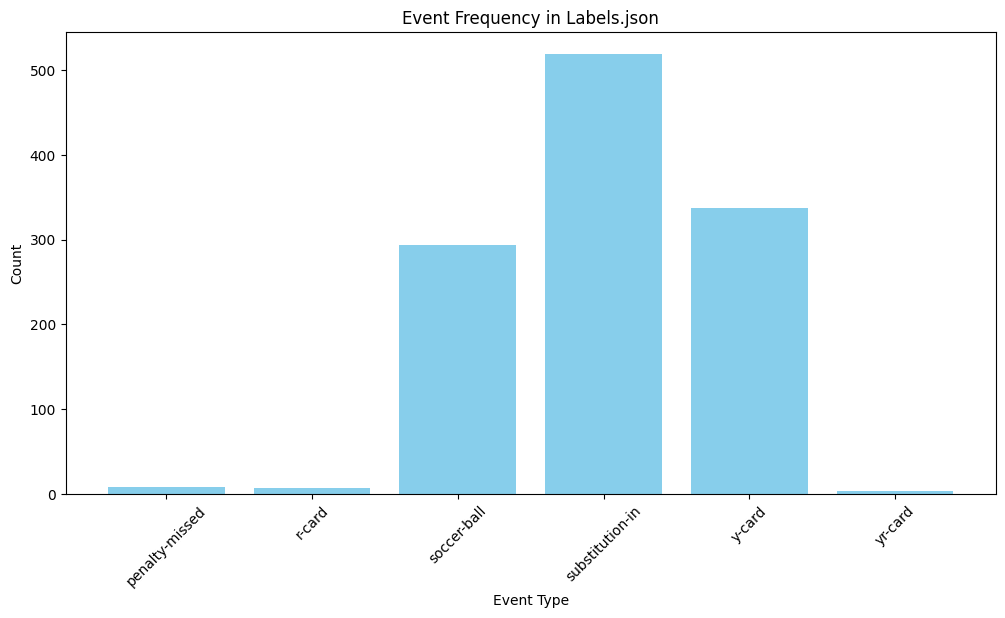

In [ ]:
import matplotlib.pyplot as plt

# Sort by label names
sorted_labels = sorted(label_count_dict.keys())
sorted_counts = [label_count_dict[label] for label in sorted_labels]

# Plot
plt.figure(figsize=(12,6))
plt.bar(sorted_labels, sorted_counts, color='skyblue')
plt.title('Event Frequency in Labels.json')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

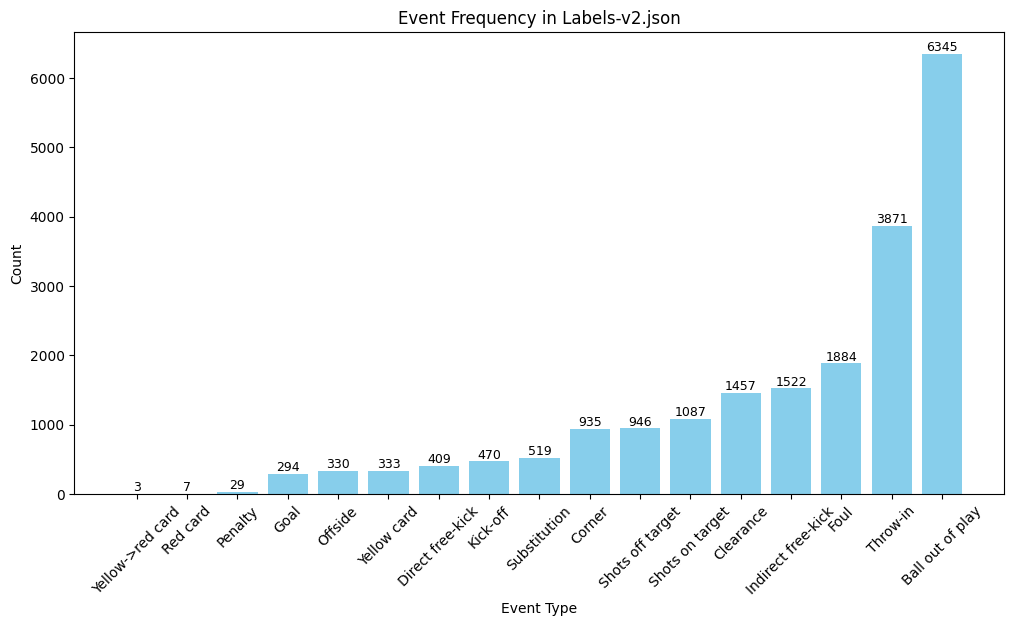

In [ ]:
# print(labelv2_count_dict)

# sortedv2_labels = sorted(labelv2_count_dict.keys())
# sortedv2_counts = [labelv2_count_dict[label] for label in sortedv2_labels]

# # Plot
# plt.figure(figsize=(12,6))
# plt.bar(sortedv2_labels, sortedv2_counts, color='skyblue')
# plt.title('Event Frequency in Labelsv2.json')
# plt.xlabel('Event Type')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.show()


import matplotlib.pyplot as plt

# Sort in increasing order based on counts
sorted_label_counts = sorted(labelv2_count_dict.items(), key=lambda x: x[1])
sortedv2_labels = [item[0] for item in sorted_label_counts]
sortedv2_counts = [item[1] for item in sorted_label_counts]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(sortedv2_labels, sortedv2_counts, color='skyblue')
plt.title('Event Frequency in Labels-v2.json')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, str(height), ha='center', va='bottom', fontsize=9)

plt.show()


In [ ]:
for label in sortedv2_labels:
    print(f"'{label}' -> count: {labelv2_count_dict[label]}")


'Ball out of play' -> count: 6345
'Clearance' -> count: 1457
'Corner' -> count: 935
'Direct free-kick' -> count: 409
'Foul' -> count: 1884
'Goal' -> count: 294
'Indirect free-kick' -> count: 1522
'Kick-off' -> count: 470
'Offside' -> count: 330
'Penalty' -> count: 29
'Red card' -> count: 7
'Shots off target' -> count: 946
'Shots on target' -> count: 1087
'Substitution' -> count: 519
'Throw-in' -> count: 3871
'Yellow card' -> count: 333
'Yellow->red card' -> count: 3



2. Temporal Heatmap of Events

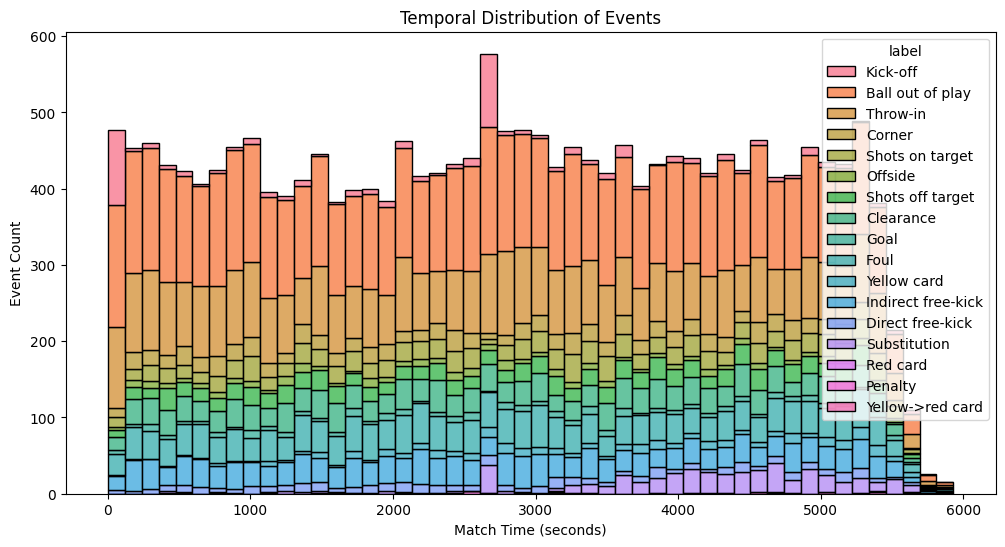

In [ ]:
# Step 1: Convert list to DataFrame
df_all_labels_v2 = pd.DataFrame(all_labels_v2)

# Step 2: Compute time in seconds
def game_time_to_seconds(game_time):
    half, time_str = game_time.split(' - ')
    minutes, seconds = map(int, time_str.split(':'))
    total_seconds = (int(half)-1)*45*60 + minutes*60 + seconds
    return total_seconds

df_all_labels_v2['time_sec'] = df_all_labels_v2['gameTime'].apply(game_time_to_seconds)


plt.figure(figsize=(12,6))
sns.histplot(data=df_all_labels_v2, x='time_sec', hue='label', multiple='stack', bins=50)
plt.title('Temporal Distribution of Events')
plt.xlabel('Match Time (seconds)')
plt.ylabel('Event Count')
plt.show()

3. Replay/Camera Transition Analysis

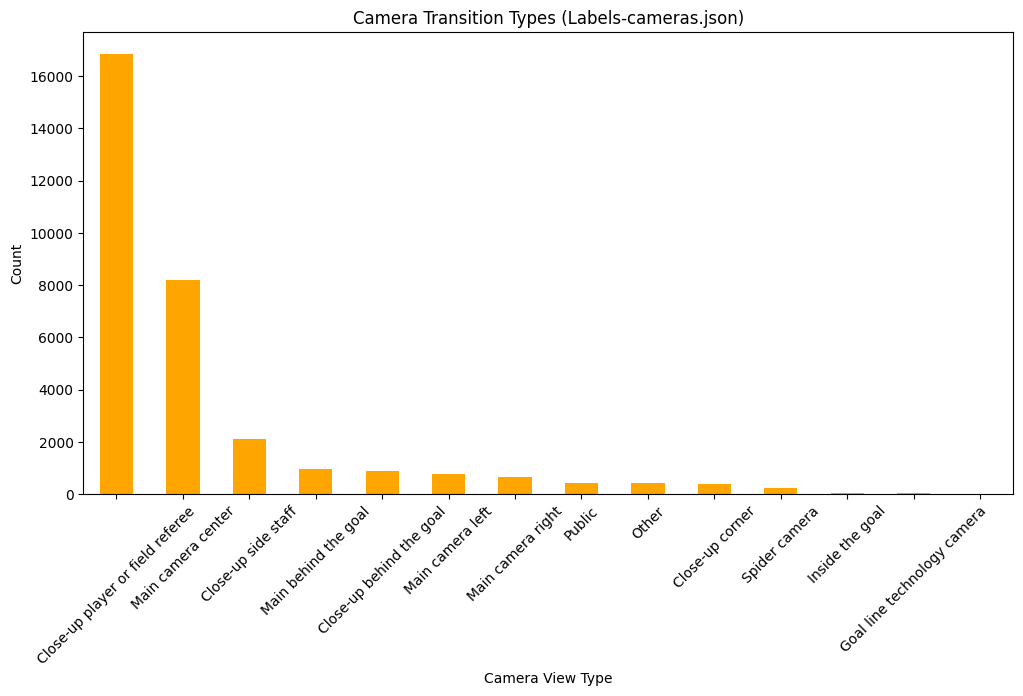

In [ ]:
plt.figure(figsize=(12,6))
df_labels_cameras=pd.DataFrame(all_labels_cameras)
df_labels_cameras['label'].value_counts().plot(kind='bar', color='orange')
plt.title('Camera Transition Types (Labels-cameras.json)')
plt.xlabel('Camera View Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

replay
real-time    26026
replay        5007
other          953
Name: count, dtype: int64


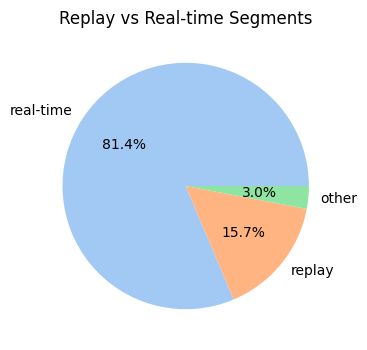

In [ ]:
# plt.figure(figsize=(6,4))
# print(df_labels_cameras['replay'].value_counts())

# df_labels_cameras['replay'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
# plt.title('Replay vs Real-time Segments')
# plt.ylabel('')
# plt.show()

import matplotlib.pyplot as plt

# Count unique labels
replay_counts = df_labels_cameras['replay'].value_counts()

# Dynamically generate colors (e.g., using seaborn palette)
colors = sns.color_palette('pastel', len(replay_counts))

# Print value counts
print(replay_counts)

# Plot
plt.figure(figsize=(6,4))
replay_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Replay vs Real-time Segments')
plt.ylabel('')
plt.show()


4. Redundancy Analysis (Event Overlap)

In [ ]:
df_labels['time_sec'] = df_labels['gameTime'].apply(game_time_to_seconds)
df_labels_cameras['time_sec'] = df_labels_cameras['gameTime'].apply(game_time_to_seconds)

plt.figure(figsize=(12,6))
plt.scatter(df_labels['time_sec'], [1]*len(df_labels), label='Events', color='blue', marker='o')
plt.scatter(df_labels_cameras['time_sec'], [0]*len(df_labels_cameras), label='Camera Transitions', color='red', marker='x')
plt.yticks([0,1], ['Camera Transitions', 'Events'])
plt.xlabel('Match Time (seconds)')
plt.title('Event and Camera Transition Overlaps')
plt.legend()
plt.show()

NameError: name 'df_labels' is not defined

5. Event Duration Distribution

Processing year: 2014-2015
Processing year: 2015-2016
Processing year: 2016-2017


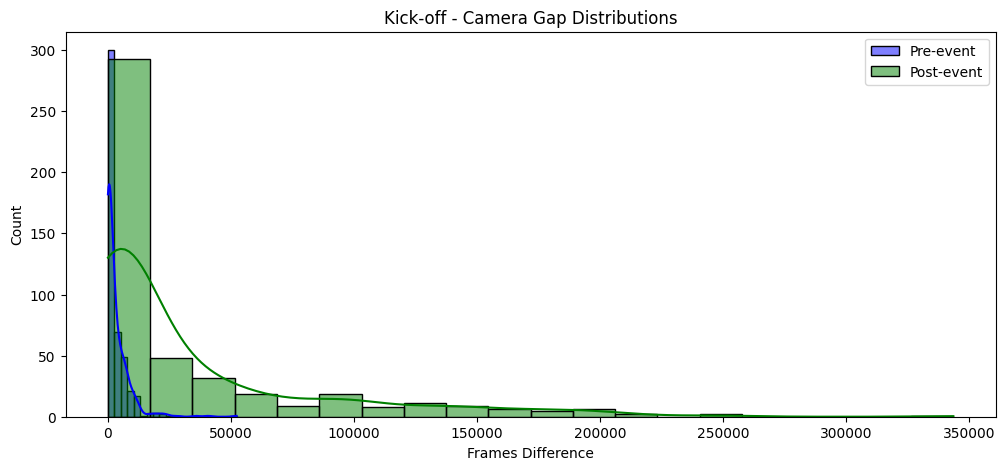

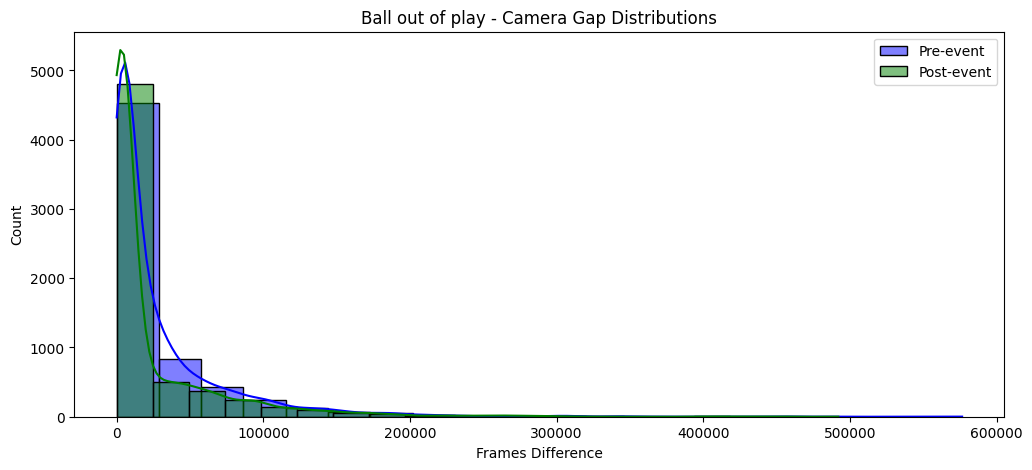

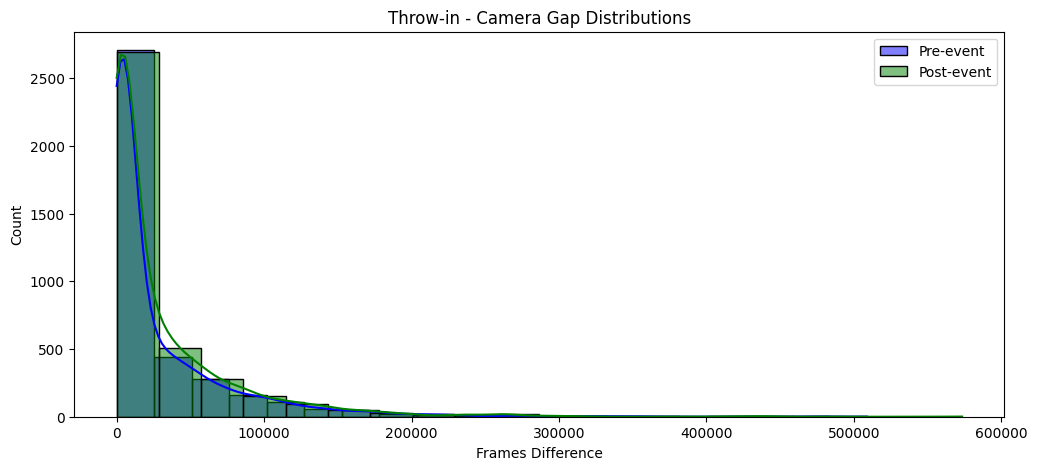

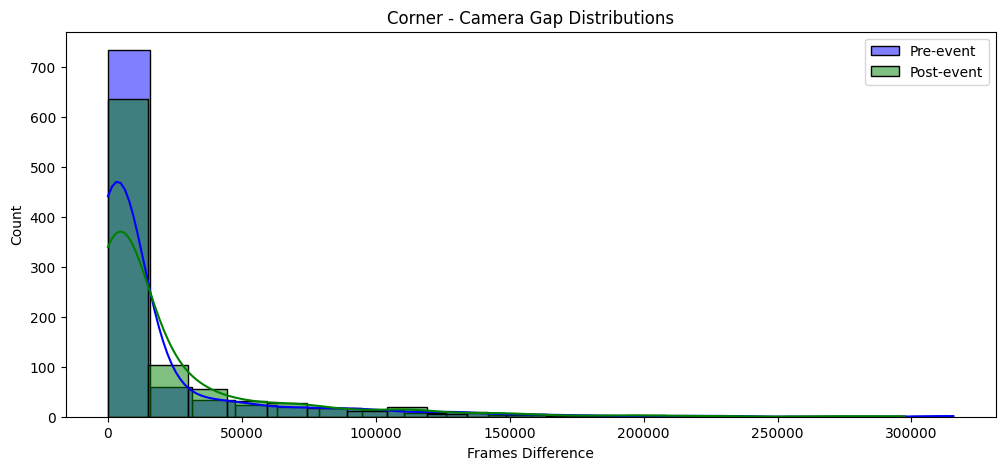

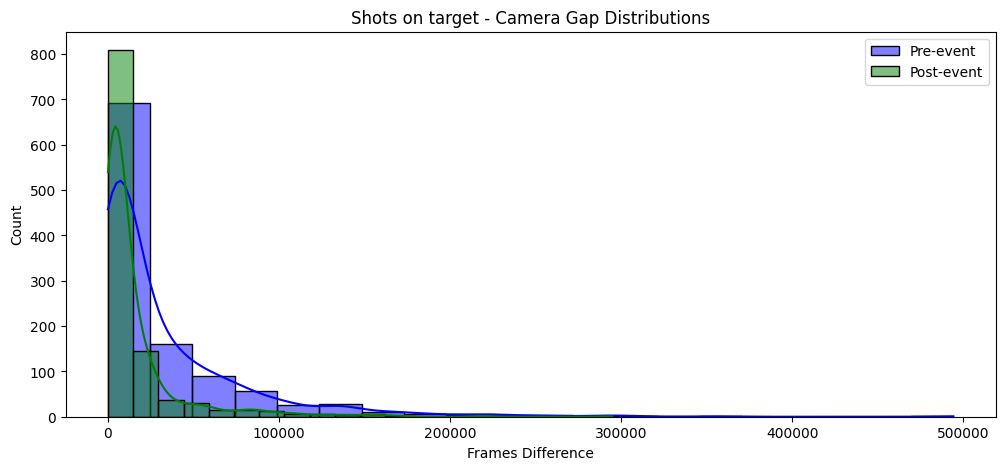

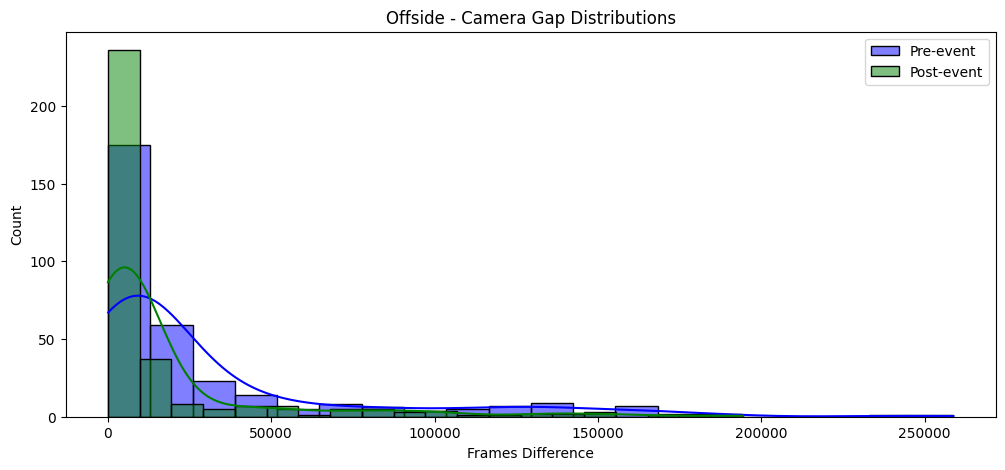

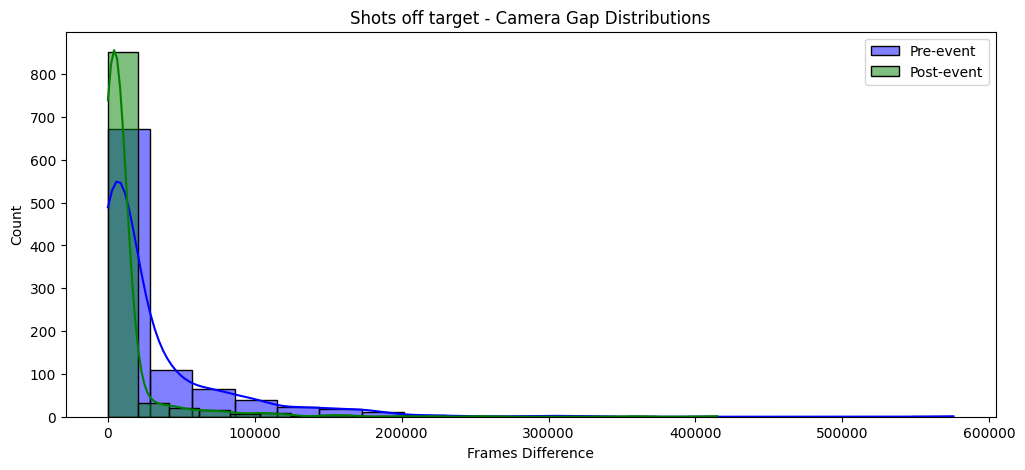

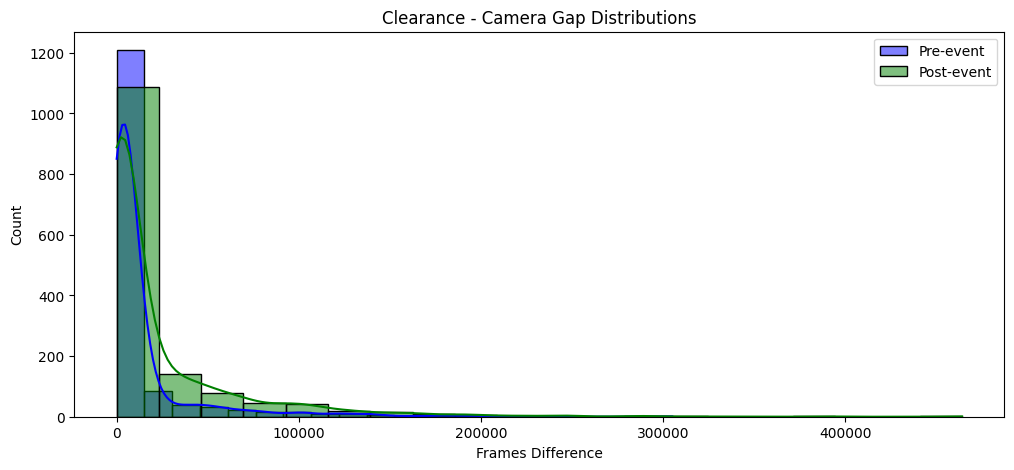

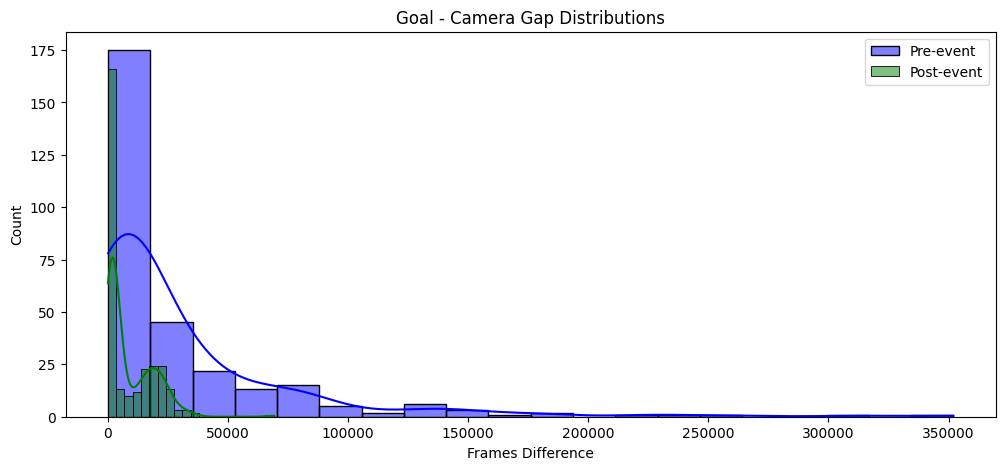

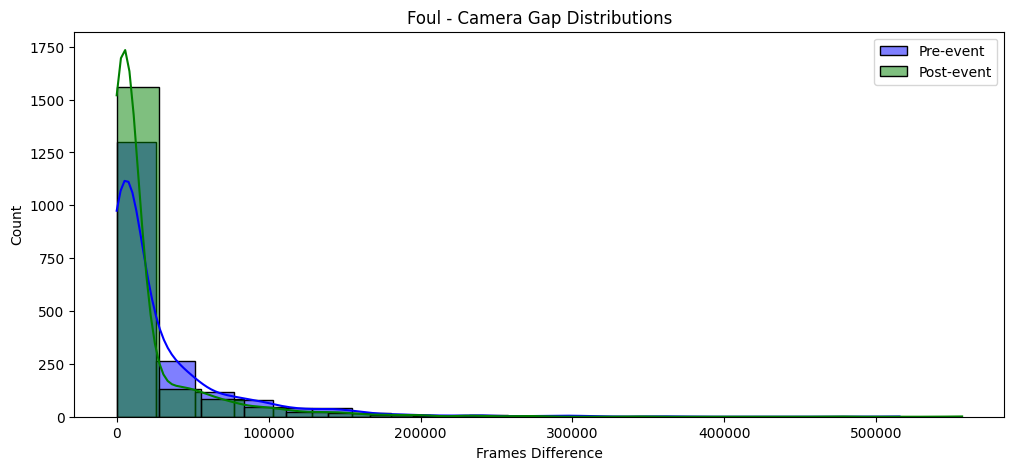

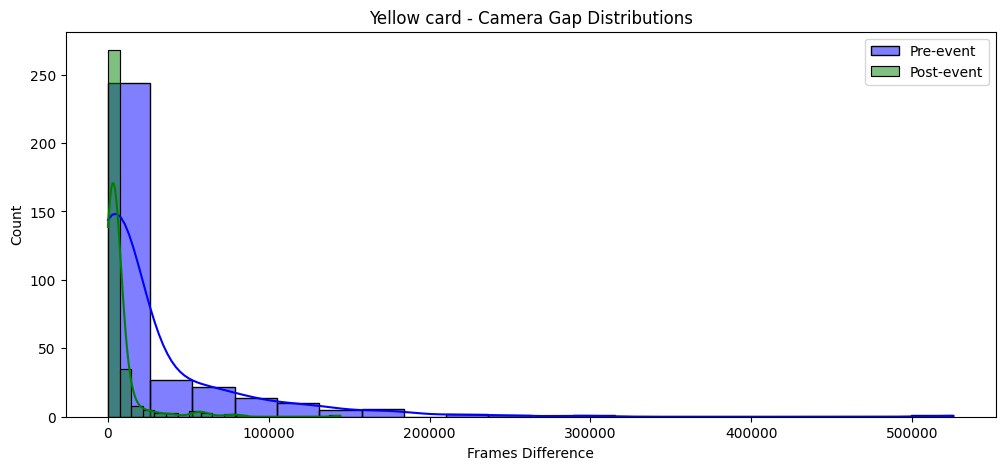

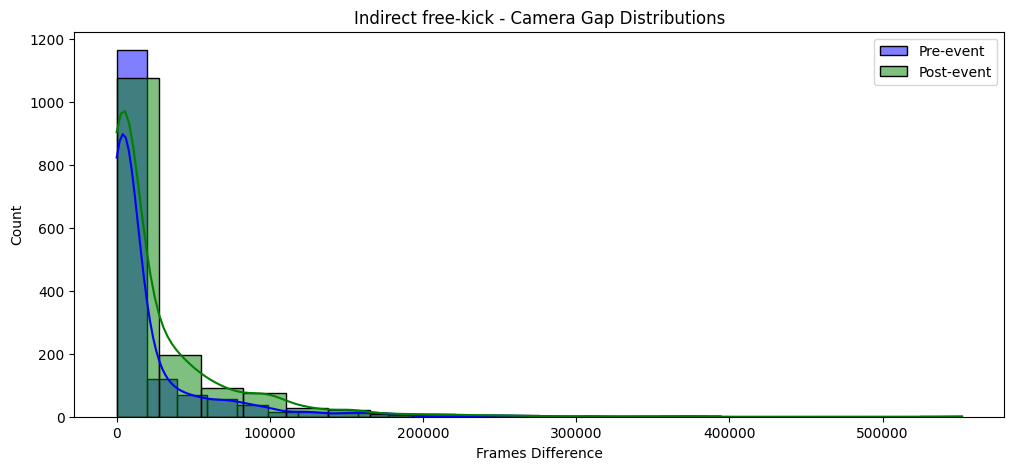

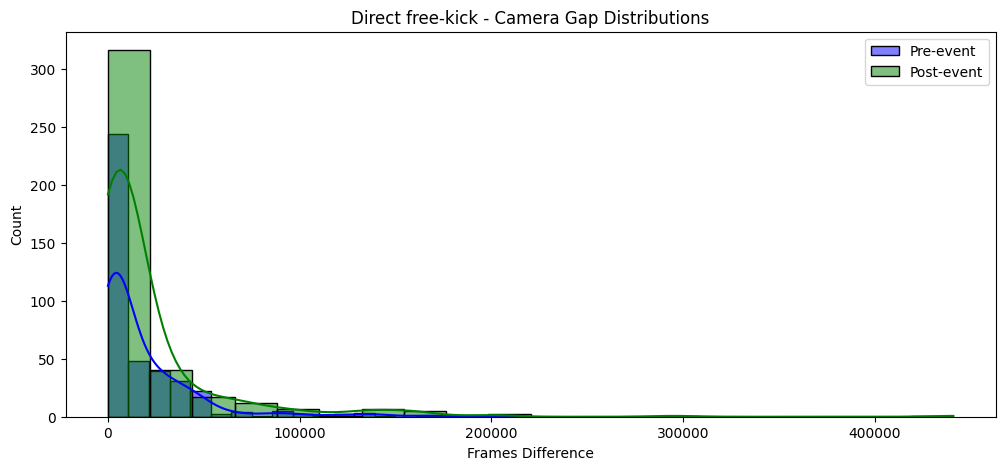

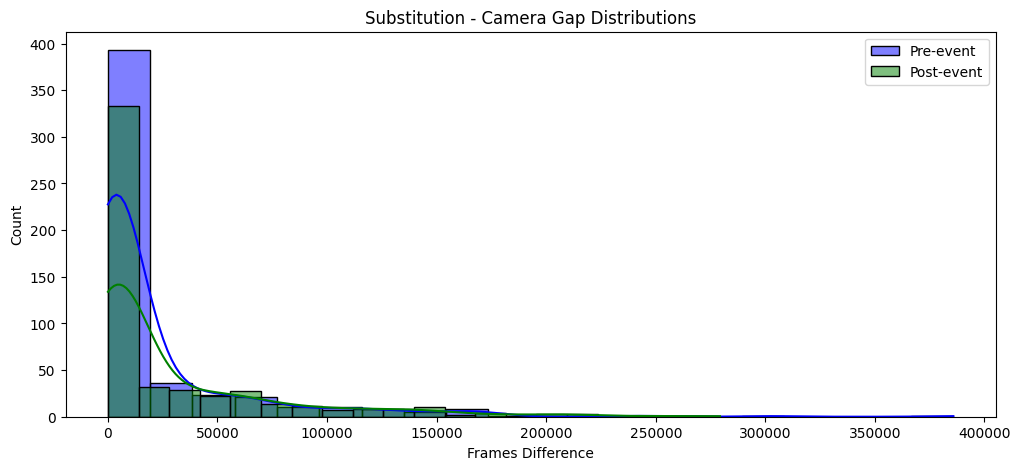

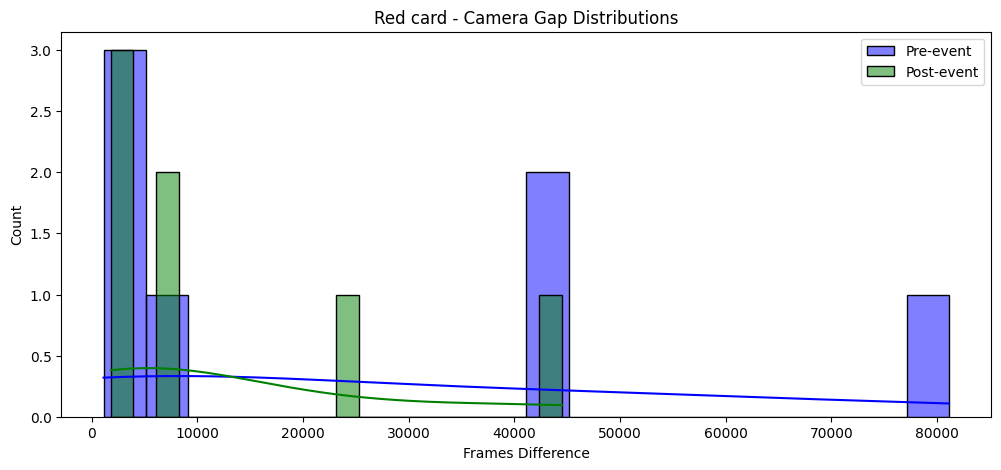

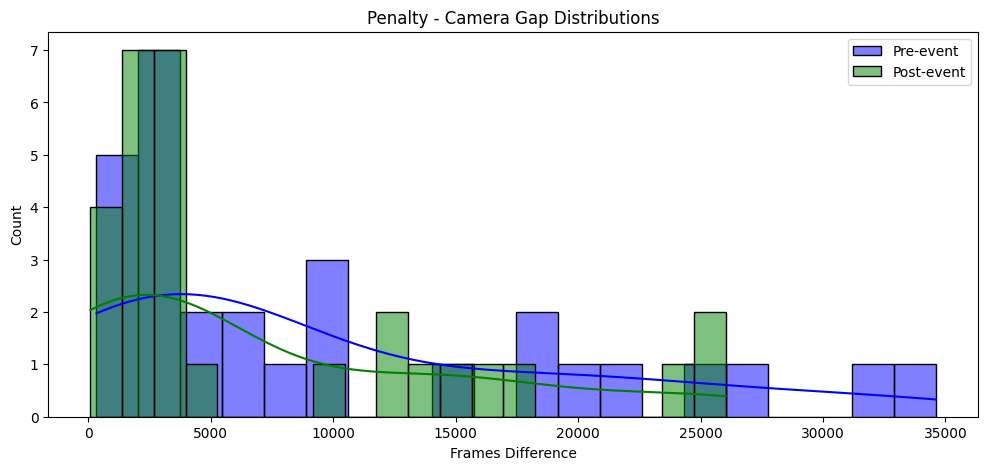

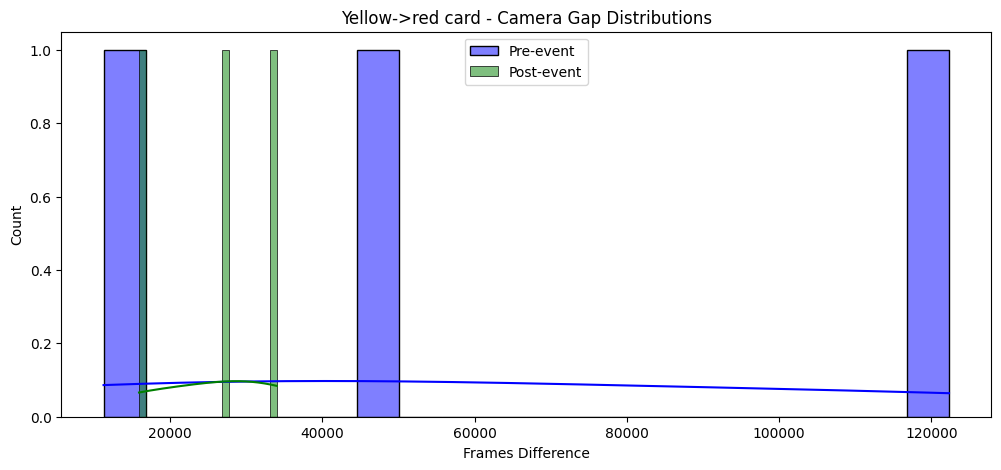

                    pre_gap_mean  pre_gap_median  pre_gap_min  pre_gap_max  \
event_type                                                                   
Ball out of play    28340.984240          9945.0            2       576536   
Clearance           13852.278655          4257.0            0       305082   
Corner              17607.453476          3779.0            0       315658   
Direct free-kick    18365.704156          6125.0            0       214181   
Foul                29026.153397          9913.5            1       515239   
Goal                30322.258503         11057.5           90       352030   
Indirect free-kick  20684.487516          4980.5            0       394267   
Kick-off             3136.380851          1042.0            0        52339   
Offside             31627.693939         12502.5           83       258791   
Penalty             10047.724138          5779.0          326        34614   
Red card            26375.285714          7653.0         1108   

In [ ]:
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -----------------------------
# CONFIG
# -----------------------------
data_root = 'path/to/soccernet/england_epl'  # Change to actual path

pre_event_gaps = []
post_event_gaps = []
event_types = []

# -----------------------------
# PROCESS EACH YEAR & MATCH
# -----------------------------
for year_folder in os.listdir(data_root):
    year_path = os.path.join(data_root, year_folder)
    if not os.path.isdir(year_path):
        continue

    matches = os.listdir(year_path)
    print(f"Processing year: {year_folder}")

    for match in matches:
        match_path = os.path.join(year_path, match)

        label_path = os.path.join(match_path, 'Labels-v2.json')
        camera_path = os.path.join(match_path, 'Labels-cameras.json')

        if not (os.path.exists(label_path) and os.path.exists(camera_path)):
            continue

        with open(label_path, 'r') as f:
            labels = json.load(f)['annotations']
        with open(camera_path, 'r') as f:
            camera_cuts = json.load(f)['annotations']

        # Extract camera cut positions and convert to int
        cut_times = sorted([int(cut['position']) for cut in camera_cuts])

        for event in labels:
            event_pos = int(event['position'])
            event_label = event['label']

            # Find previous and next camera cut
            prev_cut_candidates = [t for t in cut_times if t <= event_pos]
            next_cut_candidates = [t for t in cut_times if t >= event_pos]

            prev_cut = max(prev_cut_candidates) if prev_cut_candidates else 0
            next_cut = min(next_cut_candidates) if next_cut_candidates else event_pos + 30

            pre_gap = event_pos - prev_cut
            post_gap = next_cut - event_pos

            pre_event_gaps.append(pre_gap)
            post_event_gaps.append(post_gap)
            event_types.append(event_label)

# -----------------------------
# CREATE DATAFRAME
# -----------------------------
data = pd.DataFrame({
    'event_type': event_types,
    'pre_gap': pre_event_gaps,
    'post_gap': post_event_gaps
})

# -----------------------------
# VISUALIZE PER EVENT TYPE
# -----------------------------
unique_events = data['event_type'].unique()

for event in unique_events:
    subset = data[data['event_type'] == event]
    plt.figure(figsize=(12, 5))
    sns.histplot(subset['pre_gap'], bins=20, kde=True, color='blue', label='Pre-event')
    sns.histplot(subset['post_gap'], bins=20, kde=True, color='green', label='Post-event')
    plt.title(f'{event} - Camera Gap Distributions')
    plt.xlabel('Frames Difference')
    plt.legend()
    plt.show()

# -----------------------------
# SUMMARY STATISTICS
# -----------------------------
summary = data.groupby('event_type').agg({
    'pre_gap': ['mean', 'median', 'min', 'max', lambda x: x.quantile(0.90)],
    'post_gap': ['mean', 'median', 'min', 'max', lambda x: x.quantile(0.90)]
})

summary.columns = ['_'.join(col) for col in summary.columns]
print(summary)

# -----------------------------
# SAVE SUMMARY
# -----------------------------
summary.to_csv('soccernetv2_event_gap_summary.csv')


In [ ]:
# pip install moviepy librosa

In [ ]:
!pip show moviepy

Name: moviepy
Version: 2.1.2
Summary: Video editing with Python
Home-page: 
Author: Zulko 2024
Author-email: 
License: MIT License
Location: C:\Users\Supraja\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: decorator, imageio, imageio_ffmpeg, numpy, pillow, proglog, python-dotenv
Required-by: 


In [ ]:
pip install --upgrade moviepy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


{'video_found': True, 'audio_found': True, 'metadata': {'ENCODER': 'Lavf56.25.101'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [398, 224], 'bitrate': None, 'fps': 25.0, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'ENCODER': 'Lavc56.26.100 libx264'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': None, 'metadata': {'Metadata': '', 'ENCODER': 'Lavc56.26.100 libvorbis'}}], 'input_number': 0}], 'duration': 2700.0, 'bitrate': 393, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video_size': [398, 224], 'video_bitrate': None, 'video_fps': 25.0, 'default_audio_input_number': 0, 'default_audio_stream_number': 1, 'audio_fps': 48000, 'audio_bitrate': None, 'video_duration': 2700.0, 'video_n_frames': 67500}
c:\Users\S

MoviePy - Done.


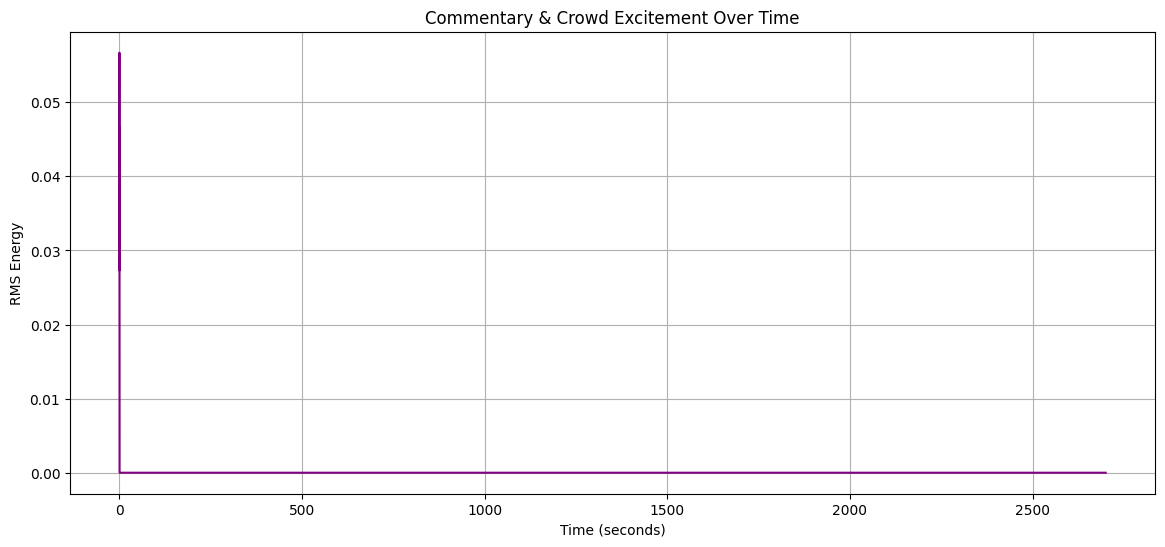

In [ ]:
from moviepy import VideoFileClip
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Load video & extract audio
video_path = r"path\to\soccernet\england_epl\2015-2016\2015-12-26 - 18-00 Manchester City 4 - 1 Sunderland\1_224p.mkv"
video = VideoFileClip(video_path)
audio = video.audio
audio_path = r'path\to\soccernet\england_epl\2015-2016\2015-12-26 - 18-00 Manchester City 4 - 1 Sunderland\1_224p.wav'
audio.write_audiofile(audio_path)

# STEP 2: Load audio using librosa
y, sr = librosa.load(audio_path)

# STEP 3: Compute RMS Energy (commentary loudness)
rms = librosa.feature.rms(y=y)[0]
frames = range(len(rms))
times = librosa.frames_to_time(frames, sr=sr)

# STEP 4: Plot
plt.figure(figsize=(14, 6))
plt.plot(times, rms, color='purple')
plt.xlabel('Time (seconds)')
plt.ylabel('RMS Energy')
plt.title('Commentary & Crowd Excitement Over Time')
plt.grid(True)
plt.show()


In [ ]:
# Find index of max RMS
max_idx = np.argmax(rms)
max_time = librosa.frames_to_time(max_idx, sr=sr)

print(f"Maximum RMS Energy occurs at: {max_time:.2f} seconds")


Maximum RMS Energy occurs at: 1706.57 seconds


In [ ]:
# Get indices of top 20 peaks
top20_indices = np.argsort(rms)[-100:][::-1]  # Descending order
top20_times = librosa.frames_to_time(top20_indices, sr=sr)

print("Top 100 Peak RMS Times (seconds):")
print(top20_times)


Top 100 Peak RMS Times (seconds):
[1706.57378685 1706.5970068   866.1507483  1706.55056689  114.54403628
   19.29578231   19.27256236  114.52081633  866.12752834 1706.62022676
 1710.14965986   19.2493424   972.59102041 1719.39120181 1710.12643991
   62.2062585   203.778322    972.56780045 1697.63410431    6.66412698
  866.17396825  114.56725624 1709.87102041   62.22947846 1706.52734694
 1697.65732426 1341.16136054    6.64090703 1697.61088435 1341.13814059
    7.54648526 1341.1845805  1719.41442177 1719.36798186 1798.94276644
  203.80154195 1798.91954649 1717.11564626   19.31900227  972.5445805
  905.6246712   905.60145125 1719.43764172 1710.17287982 1703.41587302
    6.68734694   12.2369161    61.37034014 1501.17006803   24.40417234
 1710.10321995 1716.5815873  1709.84780045 1709.89424036 1719.46086168
 1798.89632653 1703.43909297   62.25269841 2024.40852608  905.64789116
  114.49759637 1715.32770975 1861.24190476 1717.13886621   12.26013605
   24.38095238 1697.5876644   972.61424036 1

In [ ]:
import json

# Load Labels-v2.json
with open(r'path\to\soccernet\england_epl\2015-2016\2015-08-08 - 19-30 Chelsea 2 - 2 Swansea\Labels-v2.json') as f:
    labels = json.load(f)

# Convert event gameTime to seconds
def game_time_to_seconds(game_time):
    half, time_str = game_time.split(' - ')
    minutes, seconds = map(int, time_str.split(':'))
    total_seconds = (int(half)-1)*45*60 + minutes*60 + seconds
    return total_seconds

event_times = []
event_labels = []

for ann in labels['annotations']:
    event_sec = game_time_to_seconds(ann['gameTime'])
    event_times.append(event_sec)
    event_labels.append(ann['label'])


In [ ]:
def find_rms_at_time(event_time_sec):
    idx = np.argmin(np.abs(times - event_time_sec))  # Closest frame
    return rms[idx]

df_all_labels_v2['rms_energy'] = df_all_labels_v2['time_sec'].apply(find_rms_at_time)

# ----------- PRINT RESULT -----------
print(df_all_labels_v2[['gameTime', 'label', 'time_sec', 'rms_energy']])

        gameTime             label  time_sec  rms_energy
0      1 - 00:00          Kick-off         0    0.053850
1      1 - 02:13  Ball out of play       133    0.099238
2      1 - 02:29          Throw-in       149    0.055068
3      1 - 02:36  Ball out of play       156    0.029471
4      1 - 03:02            Corner       182    0.025936
...          ...               ...       ...         ...
20436  2 - 52:40          Throw-in      5860    0.054068
20437  2 - 52:52              Foul      5872    0.054068
20438  2 - 53:07       Yellow card      5887    0.054068
20439  2 - 53:51  Direct free-kick      5931    0.054068
20440  2 - 53:51   Shots on target      5931    0.054068

[20441 rows x 4 columns]


In [ ]:
print(df_all_labels_v2[['label','rms_energy']])

                  label  rms_energy
0              Kick-off    0.053850
1      Ball out of play    0.099238
2              Throw-in    0.055068
3      Ball out of play    0.029471
4                Corner    0.025936
...                 ...         ...
20436          Throw-in    0.054068
20437              Foul    0.054068
20438       Yellow card    0.054068
20439  Direct free-kick    0.054068
20440   Shots on target    0.054068

[20441 rows x 2 columns]


                 label  rms_energy
10            Red card    0.055811
9              Penalty    0.052424
16    Yellow->red card    0.052266
13        Substitution    0.052176
15         Yellow card    0.048985
12     Shots on target    0.048761
5                 Goal    0.048080
2               Corner    0.047878
11    Shots off target    0.047862
1            Clearance    0.047774
0     Ball out of play    0.047519
6   Indirect free-kick    0.047438
8              Offside    0.047413
7             Kick-off    0.047338
14            Throw-in    0.047326
3     Direct free-kick    0.047304
4                 Foul    0.047288


C:\Users\Supraja\AppData\Local\Temp\ipykernel_11608\224987809.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_rms_per_label, x='label', y='rms_energy', palette='viridis')


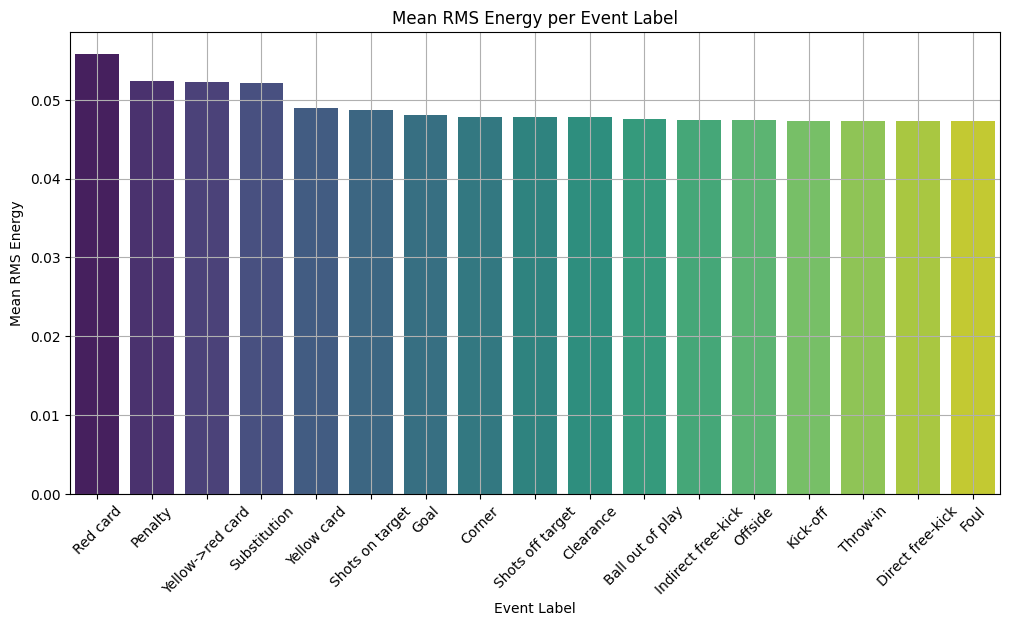

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by label & calculate mean RMS energy
mean_rms_per_label = df_all_labels_v2.groupby('label')['rms_energy'].mean().reset_index()

mean_rms_per_label = mean_rms_per_label.sort_values(by='rms_energy', ascending=False)

print(mean_rms_per_label)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=mean_rms_per_label, x='label', y='rms_energy', palette='viridis')
plt.title('Mean RMS Energy per Event Label')
plt.xlabel('Event Label')
plt.ylabel('Mean RMS Energy')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
import os
import json
import pandas as pd
import numpy as np
import librosa
from tqdm import tqdm

# Root folder
root_folder = r"path\to\soccernet\england_epl\2015-2016"

final_data = []

# --- Helper function ---
def game_time_to_seconds(game_time):
    half, time_str = game_time.split(' - ')
    minutes, seconds = map(int, time_str.split(':'))
    total_seconds = (int(half)-1)*45*60 + minutes*60 + seconds
    return int(half), total_seconds

def compute_rms(audio_path):
    y, sr = librosa.load(audio_path)
    rms = librosa.feature.rms(y=y)[0]
    times = librosa.frames_to_time(np.arange(len(rms)), sr=sr)
    return rms, times

def find_rms_at_time(event_time_sec, rms, times):
    idx = np.argmin(np.abs(times - event_time_sec))
    return rms[idx]

# --- Process each match folder ---
for folder in tqdm(os.listdir(root_folder)):
    folder_path = os.path.join(root_folder, folder)
    if not os.path.isdir(folder_path):
        continue

    # Check if audio and labels exist
    audio1_path = os.path.join(folder_path, "1_224p.wav")
    audio2_path = os.path.join(folder_path, "2_224p.wav")
    labels_path = os.path.join(folder_path, "Labels-v2.json")

    if not (os.path.exists(audio1_path) and os.path.exists(audio2_path) and os.path.exists(labels_path)):
        continue

    # Load audio
    rms1, times1 = compute_rms(audio1_path)
    rms2, times2 = compute_rms(audio2_path)

    # Load labels
    with open(labels_path) as f:
        labels = json.load(f)

    for ann in labels['annotations']:
        half, event_sec = game_time_to_seconds(ann['gameTime'])
        label = ann['label']

        if half == 1:
            rms_value = find_rms_at_time(event_sec, rms1, times1)
        else:
            # Adjust time for 2nd half (subtract first half duration)
            adjusted_time = event_sec - (45 * 60)
            rms_value = find_rms_at_time(adjusted_time, rms2, times2)

        final_data.append({
            "Match Folder": folder,
            "Half": half,
            "Event Label": label,
            "Event Time (sec)": event_sec,
            "RMS Energy": rms_value
        })

# --- Save to Excel ---
df = pd.DataFrame(final_data)
df.to_excel("match_events_rms.xlsx", index=False)
print("Saved results to match_events_rms.xlsx")


100%|██████████| 49/49 [01:55<00:00,  2.36s/it]


Saved results to match_events_rms.xlsx


           Event Label  RMS Energy
5                 Goal    0.060076
11    Shots off target    0.050895
12     Shots on target    0.050097
10            Red card    0.048629
15         Yellow card    0.045184
0     Ball out of play    0.043894
13        Substitution    0.041352
1            Clearance    0.040824
7             Kick-off    0.039424
2               Corner    0.038687
8              Offside    0.038382
4                 Foul    0.037217
6   Indirect free-kick    0.037193
14            Throw-in    0.036128
9              Penalty    0.032262
3     Direct free-kick    0.030534


C:\Users\Supraja\AppData\Local\Temp\ipykernel_11456\1707177011.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_rms_per_label, x='Event Label', y='RMS Energy', palette='magma')


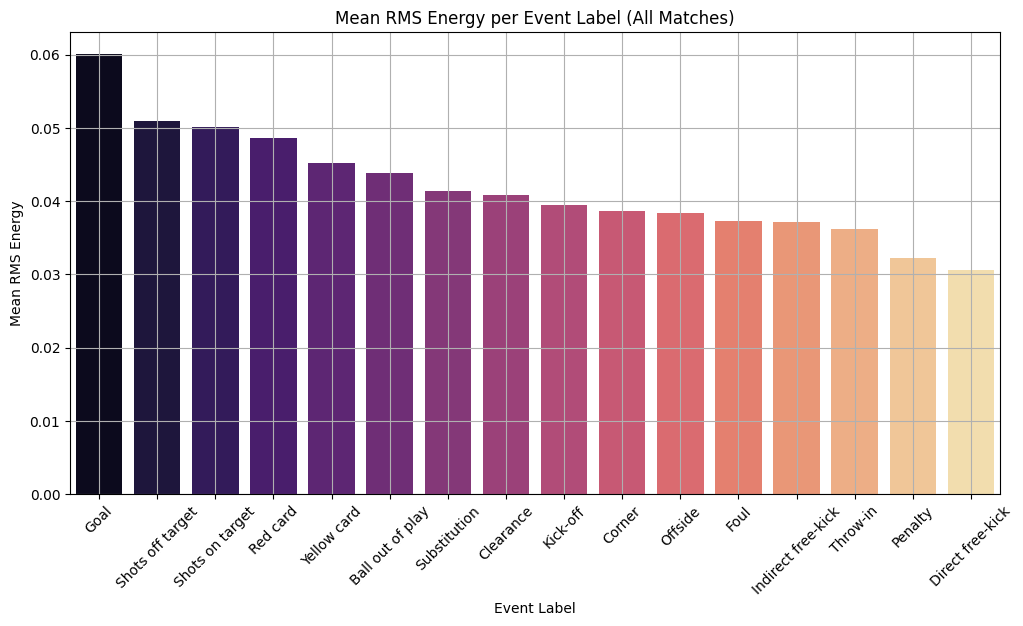

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --------- Step 1: Load Excel ---------
df = pd.read_excel('match_events_rms.xlsx')  # Change path if needed

# --------- Step 2: Group & Calculate Mean RMS Energy ---------
mean_rms_per_label = df.groupby('Event Label')['RMS Energy'].mean().reset_index()
mean_rms_per_label = mean_rms_per_label.sort_values(by='RMS Energy', ascending=False)

print(mean_rms_per_label)

# --------- Step 3: Plot ---------
plt.figure(figsize=(12,6))
sns.barplot(data=mean_rms_per_label, x='Event Label', y='RMS Energy', palette='magma')
plt.title('Mean RMS Energy per Event Label (All Matches)')
plt.xlabel('Event Label')
plt.ylabel('Mean RMS Energy')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
